In [1464]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [6]:
coffee_sales=pd.read_csv("index.csv")
# Import dataset of coffee sales from a vending machine
# https://www.kaggle.com/datasets/ihelon/coffee-sales

In [1340]:
coffee_sales.head()

,date,datetime,cash_type,card,money,coffee_name,month,hour,day,dayofweek
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,3,10,4,4
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,12,4,4
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,12,4,4
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,3,13,4,4
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,3,13,4,4


In [10]:
coffee_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1060 non-null   object 
 1   datetime     1060 non-null   object 
 2   cash_type    1060 non-null   object 
 3   card         971 non-null    object 
 4   money        1060 non-null   float64
 5   coffee_name  1060 non-null   object 
dtypes: float64(1), object(5)
memory usage: 49.8+ KB


In [142]:
## Cleaning data
coffee_sales[coffee_sales.duplicated()]

,date,datetime,cash_type,card,money,coffee_name


In [144]:
coffee_sales[coffee_sales['card'].isnull()]

,date,datetime,cash_type,card,money,coffee_name
12,2024-03-02,2024-03-02 10:30:35.668,cash,NaN,40.0,Latte
18,2024-03-03,2024-03-03 10:10:43.981,cash,NaN,40.0,Latte
41,2024-03-06,2024-03-06 12:30:27.089,cash,NaN,35.0,Americano with Milk
46,2024-03-07,2024-03-07 10:08:58.945,cash,NaN,40.0,Latte
49,2024-03-07,2024-03-07 11:25:43.977,cash,NaN,40.0,Latte
...,...,...,...,...,...,...
657,2024-05-31,2024-05-31 09:23:58.791,cash,NaN,39.0,Latte
677,2024-06-01,2024-06-01 20:54:59.267,cash,NaN,39.0,Cocoa
685,2024-06-02,2024-06-02 22:43:10.636,cash,NaN,34.0,Americano with Milk
691,2024-06-03,2024-06-03 21:42:51.734,cash,NaN,34.0,Americano with Milk


In [366]:
coffee_sales.fillna({'card': 'pay by cash'}, inplace=True)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [162]:
coffee_sales['datetime']=pd.to_datetime(coffee_sales.datetime) # Convert data to datetime format

In [1452]:
## Analysing purchasing pattern
coffee_sales['hour'].value_counts() # Number of orders for each hour

hour
10    128
11     95
19     92
12     83
13     75
16     75
18     74
14     72
17     72
21     65
15     64
20     43
9      40
8      39
22     32
7      11
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x292b6e630>,
 [Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22')])

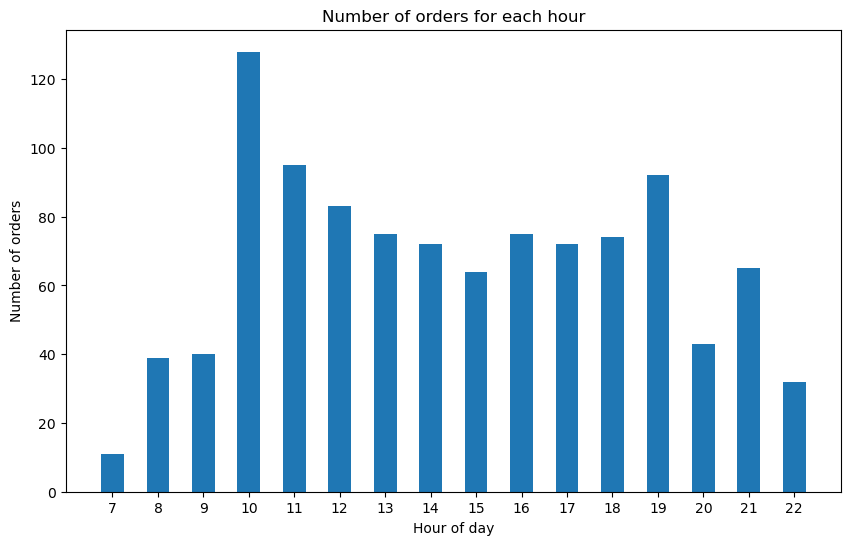

In [1454]:
# Visualize number of orders for each hour
 
plt.figure(figsize=(10,6))
plt.title('Number of orders for each hour')
plt.xlabel('Hour of day')
plt.ylabel('Number of orders')

coffee_sales['hour'] = coffee_sales.datetime.dt.hour
plt.bar(coffee_sales['hour'].value_counts().index ,coffee_sales['hour'].value_counts(), width=0.5)
plt.xticks(range(7, 23, 1))

# Highest number of orders: 10am-11am; Second highest: 11am-12noon; Third highest: 7pm-8pm
# Possible reason: People buy drinks when they go to work(10am-12noon) and get off work(7pm-8pm)

# Operating time for the vending machine is from 7am to 10pm

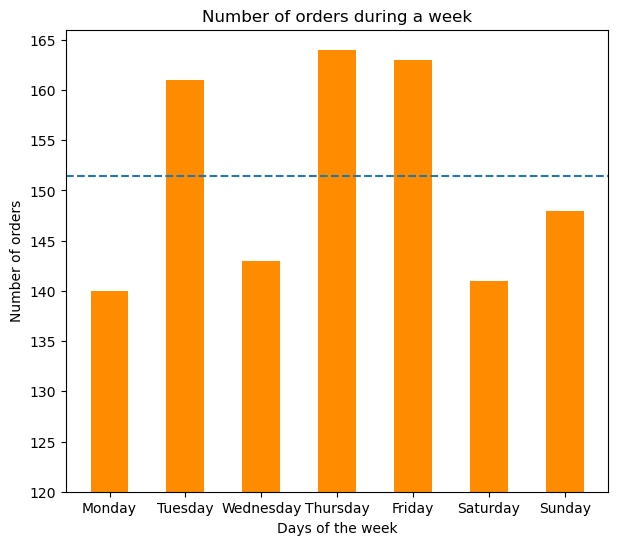

In [1472]:
plt.figure(figsize=(7,6))
plt.ylabel('Number of orders')
plt.xlabel('Days of the week')
plt.title('Number of orders during a week')

coffee_sales['dayofweek'] = coffee_sales.datetime.dt.dayofweek
plt.bar(coffee_sales['dayofweek'].value_counts().index, coffee_sales['dayofweek'].value_counts(), width=0.5, color='darkorange')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday','Sunday'])


plt.ylim(120, 166)
plt.yticks(range(120, 166, 5)) #Change the scale and stepsize of graph

plt.axhline(y=np.nanmean(coffee_sales['dayofweek'].value_counts()),linestyle = '--') # Add average line

# Number of orders on Tuesday, Thursday and Friday are above average 

In [26]:
coffee_sales['coffee_name'].unique()

array(['Latte', 'Hot Chocolate', 'Americano', 'Americano with Milk',
       'Cocoa', 'Cortado', 'Espresso', 'Cappuccino'], dtype=object)

In [38]:
coffee_sales['coffee_name'].value_counts()
# Americano with Milk is the best seller

coffee_name
Americano with Milk    242
Latte                  229
Cappuccino             187
Americano              162
Cortado                 92
Hot Chocolate           72
Espresso                44
Cocoa                   32
Name: count, dtype: int64

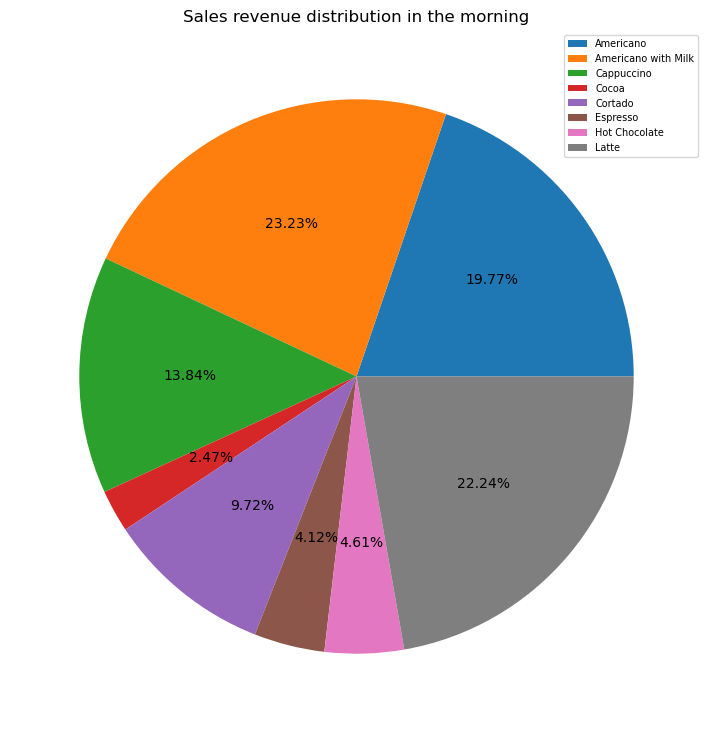

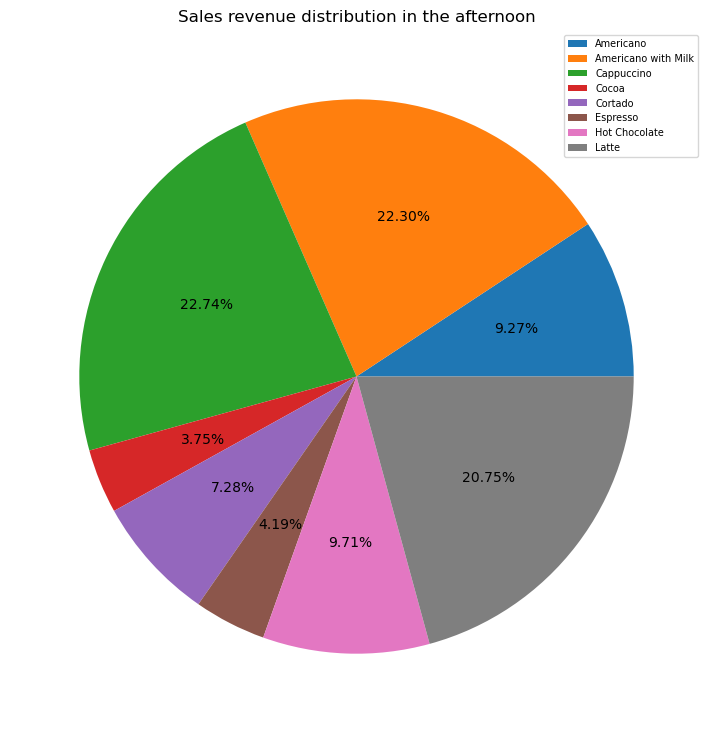

In [1442]:
## Analysing customer perferences 

# Before 4pm
morning_proportion=coffee_sales.loc[hour < 16, 'coffee_name'].value_counts().to_frame().sort_values(by=['coffee_name']) # For better visualization, sort value by name instead of by proportion
plt.figure(figsize=(9,9))
plt.pie(morning_proportion['count'], autopct='%1.2f%%') # Show Percentage
plt.legend(morning_proportion.index, fontsize='7',loc='upper right')
plt.title('Sales revenue distribution in the morning')

# After or on 4pm
afternoon_proportion=coffee_sales.loc[hour >= 16, 'coffee_name'].value_counts().to_frame().sort_values(by=['coffee_name']) 
plt.figure(figsize=(9,9))
plt.pie(afternoon_proportion['count'], autopct='%1.2f%%')
plt.legend(afternoon_proportion.index, fontsize='7',loc='upper right')
plt.title('Sales revenue distribution in the afternoon')

plt.show() 

# In the afternoon,
# contribution of americano on sales revenue is lowered significantly by around 10%;
# contribution of non-caffine drinks (hot chocolate and cocoa) is approximately doubled

# Possible reason: People stop drinking caffeine within eight hour before bedtime, following the advice from nutrition experts

In [1394]:
## Analysing sales performance and sales trend

coffee_list=coffee_sales['coffee_name'].unique() 

for coffee_name in coffee_list:
    counting=coffee_sales[(coffee_sales['coffee_name']==coffee_name)][['coffee_name','cash_type','money']] #group coffee price using for loop
    print(counting.value_counts().to_frame().sort_values(by=['money'], ascending=False))

# Findings:
# 1. For almost drinks, price of drinks is higher if customers choose to pay with cash
# 2. No matter which payment type, price of drinks changes 

                             count
coffee_name cash_type money       
Latte       cash      40.00     16
                      39.00      9
            card      38.70     51
                      37.72    115
                      32.82     38
                               count
coffee_name   cash_type money       
Hot Chocolate cash      40.00      5
                        39.00      1
              card      38.70     29
                        37.72     28
                        32.82      9
                             count
coffee_name cash_type money       
Americano   cash      30.00      6
                      29.00      8
            card      28.90     53
                      27.92     72
                      23.02     23
                                     count
coffee_name         cash_type money       
Americano with Milk cash      35.00      8
                              34.00      7
                    card      33.80     51
                              32.82 

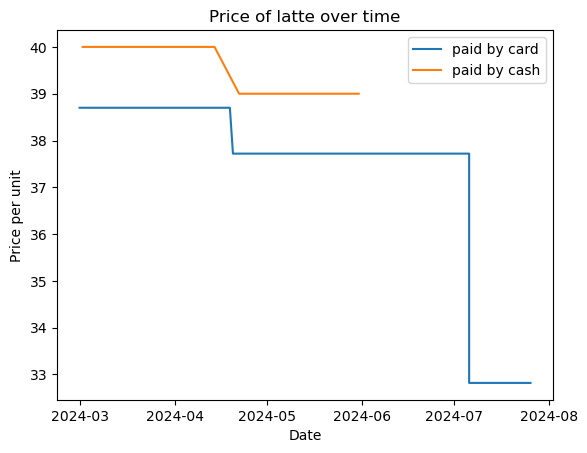

In [1474]:
# Visualize price of latte over time 

coffee_sales['date']=coffee_sales.datetime.dt.date

plt.ylabel('Price per unit')
plt.xlabel('Date')
plt.title('Price of latte over time')

latte_sales_card=coffee_sales[(coffee_sales['coffee_name']=='Latte')& (coffee_sales['cash_type']=='card')] 
latte_sales_card.set_index('date',inplace=True) #set date as index

latte_sales_cash=coffee_sales[(coffee_sales['coffee_name']=='Latte')& (coffee_sales['cash_type']=='cash')]
latte_sales_cash.set_index('date',inplace=True)

plt.plot(latte_sales_card.index, latte_sales_card['money'], label='paid by card')
plt.plot(latte_sales_cash.index, latte_sales_cash['money'], label='paid by cash')

plt.legend()

# Findings:
# 1. Price of latte declines in early April and July 2024
# 2. No customer buys latte in cash after June 2024

In [468]:
coffee_sales.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
# Although americano with milk is the best seller, sales revenue of latte is the highest across the period

coffee_name
Latte                  8549.66
Americano with Milk    7876.02
Cappuccino             7037.76
Americano              4483.40
Hot Chocolate          2712.84
Cortado                2583.94
Cocoa                  1197.48
Espresso               1010.02
Name: money, dtype: float64

In [1488]:
coffee_sales.groupby(['month','coffee_name'])['money'].sum() # Group by month and type of coffee and calculate revenue  

month  coffee_name        
3      Americano              1044.80
       Americano with Milk    1154.00
       Cappuccino              780.50
       Cocoa                   232.20
       Cortado                 869.20
       Espresso                241.00
       Hot Chocolate           854.00
       Latte                  1874.50
4      Americano              1001.94
       Americano with Milk    1407.74
       Cappuccino             1659.44
       Cocoa                   232.82
       Cortado                 548.48
       Espresso                171.00
       Hot Chocolate           506.02
       Latte                  1193.12
5      Americano              1348.80
       Americano with Milk    1908.28
       Cappuccino             2078.44
       Cocoa                   340.76
       Cortado                 474.64
       Espresso                185.14
       Hot Chocolate           529.36
       Latte                  2198.00
6      Americano               390.88
       Americano with M

In [1486]:
Revenue.groupby('month').apply(lambda x: (x.idxmax(), x.max()))
# Highest sales revenue of each month

month
3                   ((3, Latte), 1874.5)
4             ((4, Cappuccino), 1659.44)
5                   ((5, Latte), 2198.0)
6    ((6, Americano with Milk), 2268.12)
7                  ((7, Latte), 1398.04)
Name: money, dtype: object

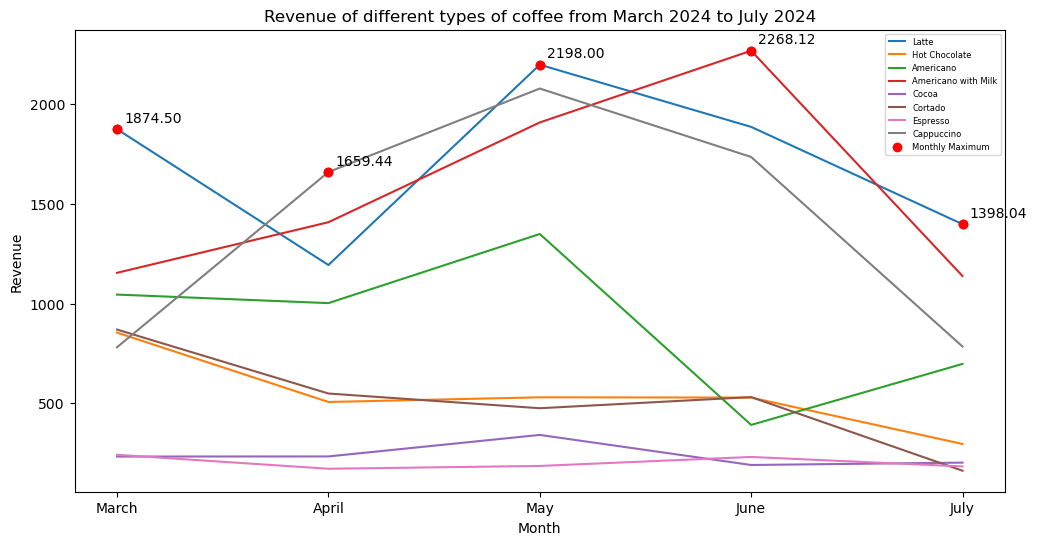

In [1516]:
# Visualize sales revenue of different types of coffee from March to July


plt.figure(figsize=(12,6))
plt.title('Revenue of different types of coffee from March 2024 to July 2024')
plt.xlabel('Month')
plt.ylabel('Revenue')

Revenue_frame=Revenue.to_frame().reset_index() # Convert to dataframe for convenience
coffee_types=coffee_sales['coffee_name'].unique() # List of coffee_name 

# Use for loop to plot multiple lines chart 
for coffee_type in coffee_types:
    plt.plot(Revenue_frame.loc[Revenue_frame['coffee_name']==coffee_type,['month']],Revenue_frame.loc[Revenue_frame['coffee_name']==coffee_type,['money']],
             label=coffee_type)

# Plot maximum point
monthly_max = Revenue_frame.groupby('month')['money'].max()
plt.plot(monthly_max.index, monthly_max.values, 'ro', label='Monthly Maximum') 

# Label maximum point 
for month, max_revenue in monthly_max.items():
    max_idx = Revenue_frame.loc[Revenue_frame['month']==month, 'money'].idxmax()
    plt.plot(month, max_revenue, 'ro')
    plt.annotate(f"{max_revenue:.2f}", (month, max_revenue), xytext=(5, 5), textcoords="offset points") 


plt.xticks([3, 4, 5, 6 , 7], ['March', 'April', 'May','June', 'July'])
plt.legend(fontsize='6')

# Findings:
# 1. Sales revenue of almost drinks increase on May; and decrease on July
# 2. Sales revenue of hot chocolate and cortado are declining across the period
# 3. Sales revenue of Espresso and cocoa is stable at a low level